<IPython.core.display.Javascript object>


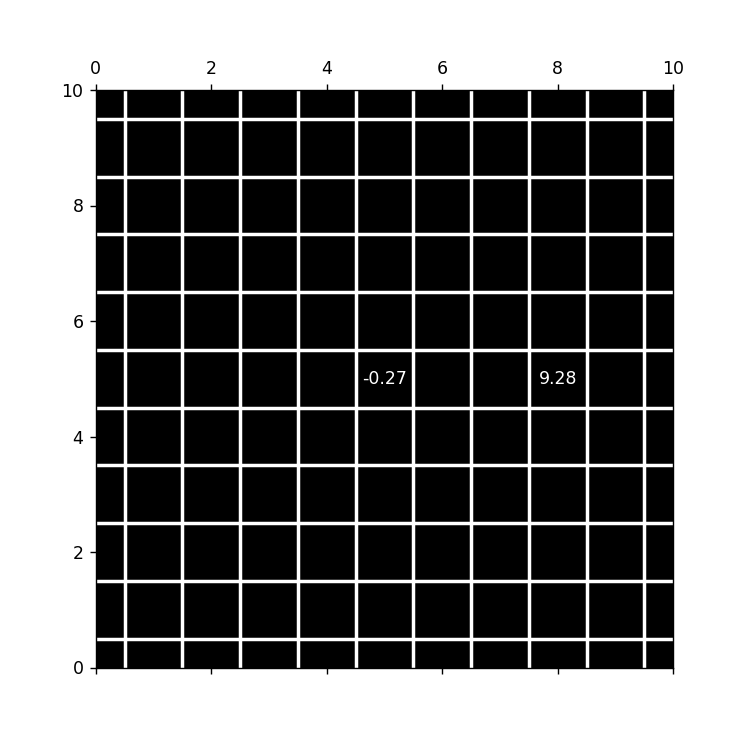

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# This code is based on an Idea that was presented by Johannes Hog in the progress seminar.

# Define a function
def function(x, y):
    return np.sin(x) * np.cos(y) + (x - 5)**2 + (y - 5)**2

# Create a 10x10 grid for x and y values from 1 to 10
x = np.linspace(0, 10, 11)  # x values from 1 to 10, 10 points
y = np.linspace(0, 10, 11)  # y values from 1 to 10, 10 points
X, Y = np.meshgrid(x, y)  # Create a 2D meshgrid of x and y values

# Calculate the function values for the entire grid
Z = function(X, Y)

# Initialize the grid display: All cells are gray, no function values visible
Z_display = np.zeros((10, 10))  # Gray (0) means not clicked yet
Z_text = np.full((10, 10), '', dtype=object)  # Text array to store function values for each cell

# Function to be called when a cell is clicked
def on_click(event):
    global Z_text
    if event.inaxes:
        # Convert the clicked position to grid coordinates (X, Y)
        col = int(event.xdata)  # Column of the clicked cell
        row = int(event.ydata)  # Row of the clicked cell

        # Ensure the click is within the bounds of the grid
        if 0 <= col < 10 and 0 <= row < 10:
            # Calculate the function value at this position (x, y)
            value = function(X[row, col], Y[row, col])
            Z_text[row, col] = f'{value:.2f}'  # Store the function value as text

            print(f"Clicked on box ({col+1}, {row+1}) with value: {value:.2f}")
            
            # Redraw the plot with updated values
            ax.clear()  # Clear the previous plot
            ax.matshow(Z_display, cmap='gray', extent=[0, 10, 0, 10])  # Keep all cells gray
            # Display the function value in the clicked cell
            for i in range(10):
                for j in range(10):
                    if Z_text[i, j]:  # Only display text if the function value is present
                        # Place text in the center of the cell
                        ax.text(j, i, Z_text[i, j], ha='center', va='center', color='white')

            # Add gridlines and axis labels
            ax.set_xticks(np.arange(0.5, 10.5, 1), minor=True)  # X-axis gridlines
            ax.set_yticks(np.arange(0.5, 10.5, 1), minor=True)  # Y-axis gridlines
            ax.grid(which="minor", color="white", linestyle='-', linewidth=2)  # Grid style
            ax.tick_params(which="minor", size=0)  # Hide axis ticks
            
            plt.draw()

# Create the 10x10 grid plot
fig, ax = plt.subplots(figsize=(6, 6))  # Set the figure size to 6x6 inches

# Initial display: All cells are gray
ax.matshow(Z_display, cmap='gray', extent=[0, 10, 0, 10])

# Connect the click event to the on_click function
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


In [13]:
import numpy as np

class GradientDescent:
    def __init__(self, func, grad_func, hess_func=None, learning_rate=0.1, max_iter=1000, tolerance=1e-6, method='gradient'):
        """
        Initialize the Gradient Descent optimizer for a 2D function.

        Args:
            func: The function to minimize.
            grad_func: The gradient of the function (first derivatives).
            hess_func: The Hessian of the function (second derivatives), optional.
            learning_rate: Step size for the updates.
            max_iter: Maximum number of iterations.
            tolerance: Threshold for stopping the optimization.
            method: Method to use ('gradient' or 'newton').
        """
        self.func = func
        self.grad_func = grad_func
        self.hess_func = hess_func
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.method = method  # 'gradient' or 'newton'
        self.history = []  # Store function values for visualization

    def minimize(self, initial_params):
        """
        Perform gradient descent to find the minimum of the function.

        Args:
            initial_params: Starting point for the optimization.

        Returns:
            Optimal parameters and the value of the function at the minimum.
        """
        params = np.array(initial_params, dtype=float)
        for i in range(self.max_iter):
            # Compute the gradient at the current parameters
            grad = self.grad_func(params)

            if self.method == 'newton' and self.hess_func is not None:
                # Compute the Hessian matrix if using Newton's method
                hess = self.hess_func(params)
                # Update the parameters using the Newton's method update rule
                new_params = params - self.learning_rate * np.linalg.inv(hess) @ grad
            else:
                # Use standard gradient descent
                new_params = params - self.learning_rate * grad

            # Evaluate the function value at the new parameters
            func_value = self.func(new_params)
            self.history.append(func_value)

            # Check for convergence
            if np.linalg.norm(new_params - params) < self.tolerance:
                print(f"Converged after {i+1} iterations.")
                break

            params = new_params

        return params, self.func(params)

# Example 2D function: f(x, y) = sin(x) * cos(y) + (x - 5)^2 + (y - 5)^2
def func(params):
    x, y = params
    return np.sin(x) * np.cos(y) + (x - 5)**2 + (y - 5)**2

# Gradient of the function (first derivatives)
def grad_func(params):
    x, y = params
    grad_x = np.cos(x) * np.cos(y) + 2 * (x - 5)  # Derivative of f with respect to x
    grad_y = -np.sin(x) * np.sin(y) + 2 * (y - 5)  # Derivative of f with respect to y
    return np.array([grad_x, grad_y])

# Hessian (second derivatives) of the function
def hess_func(params):
    x, y = params
    # Second partial derivatives (Hessian matrix):
    d2f_dx2 = -np.sin(x) * np.cos(y) + 2  # Second derivative of f with respect to x
    d2f_dy2 = -np.cos(x) * np.cos(y) + 2  # Second derivative of f with respect to y
    d2f_dxdy = np.sin(x) * np.sin(y)  # Mixed second derivative of f with respect to x and y
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Use the gradient descent with second derivatives (Newton's method)
gd = GradientDescent(func=func, grad_func=grad_func, hess_func=hess_func, learning_rate=0.1, max_iter=1000, tolerance=1e-6, method='newton')

# Minimize the function starting from initial point (0, 0)
initial_params = [0, 0]
optimal_params, optimal_value = gd.minimize(initial_params)

print("Optimal Parameters:", optimal_params)
print("Function Value at Minimum:", optimal_value)


Converged after 148 iterations.
Optimal Parameters: [4.93226159 5.38244961]
Function Value at Minimum: -0.45522608074666726
